# Cross-referencing with other TESS pipelines

In [1]:
import lightkurve as lk
import pandas as pd
import matplotlib.pyplot as plt
import os
os.chdir('../scripts')
from analysis_tools_cython import *

In [2]:
 data = pd.read_csv('../candidates/candidates-full.csv')#'candidates-full-df.csv')# 

In [3]:
data = data[data['class'] == 'yellow']

In [4]:
tic_ids = data.TIC_ID.values
sector = data.Sector.values

In [5]:
from astroquery.mast import Observations

In [6]:
Observations.query_criteria(provenance_name=('TESS-SPOC','SPOC', 'QLP'), target_name=tic_ids[0])

intentType,obs_collection,provenance_name,instrument_name,project,filters,wavelength_region,target_name,target_classification,obs_id,s_ra,s_dec,dataproduct_type,proposal_pi,calib_level,t_min,t_max,t_exptime,em_min,em_max,obs_title,t_obs_release,proposal_id,proposal_type,sequence_number,s_region,jpegURL,dataURL,dataRights,mtFlag,srcDen,obsid,objID
str7,str4,str9,str10,str4,str4,str7,str9,str1,str58,float64,float64,str10,str19,int64,float64,float64,float64,float64,float64,str1,float64,str3,str1,int64,str48,str1,str116,str6,bool,float64,str8,str9
science,HLSP,TESS-SPOC,Photometer,TESS,TESS,Optical,237332137,--,hlsp_tess-spoc_tess_phot_0000000237332137-s0028_tess_v1_tp,346.680079879418,-62.7551940252484,timeseries,Douglas A. Caldwell,4,59061.35730781,59086.6001763,600.0,600.0,1000.0,--,59235.34013895,N/A,--,28,CIRCLE ICRS 346.68007988 -62.75519403 0.00111111,--,mast:HLSP/tess-spoc/s0028/target/0000/0002/3733/2137/hlsp_tess-spoc_tess_phot_0000000237332137-s0028_tess_v1_lc.fits,PUBLIC,False,nan,53757835,97699437
science,HLSP,QLP,Photometer,TESS,TESS,Optical,237332137,--,hlsp_qlp_tess_ffi_s0001-0000000237332137_tess_v01_llc,346.680035,-62.755203,timeseries,Chelsea X. Huang,4,58324.82715051,58352.66042013,1800.0,600.0,1000.0,--,59260.77603004,N/A,--,1,CIRCLE ICRS 346.68003500 -62.75520300 0.00111111,--,mast:HLSP/qlp/s0001/0000/0002/3733/2137/hlsp_qlp_tess_ffi_s0001-0000000237332137_tess_v01_llc.fits,PUBLIC,False,nan,59439431,103381033
science,HLSP,TESS-SPOC,Photometer,TESS,TESS,Optical,237332137,--,hlsp_tess-spoc_tess_phot_0000000237332137-s0001_tess_v1_tp,346.680079879418,-62.7551940252484,timeseries,Douglas A. Caldwell,4,58324.81591078704,58352.6700147338,1800.0,600.0,1000.0,--,59309.55839107,N/A,--,1,CIRCLE ICRS 346.68007988 -62.75519403 0.00111111,--,mast:HLSP/tess-spoc/s0001/target/0000/0002/3733/2137/hlsp_tess-spoc_tess_phot_0000000237332137-s0001_tess_v1_lc.fits,PUBLIC,False,nan,59792019,105594472
science,HLSP,QLP,--,TESS,TESS,Optical,237332137,--,hlsp_qlp_tess_ffi_s0028-0000000237332137_tess_v01_llc,346.680079879,-62.7551940252,timeseries,Chelsea X. Huang,4,59061.35465908796,59086.5975279063,600.0,600.0,1000.0,--,59562.63230319,N/A,--,28,CIRCLE ICRS 346.68007988 -62.75519403 0.00111111,--,mast:HLSP/qlp/s0028/0000/0002/3733/2137/hlsp_qlp_tess_ffi_s0028-0000000237332137_tess_v01_llc.fits,PUBLIC,False,nan,64529718,130955681


In [7]:
lightcurves_dict = {}
lightcurves_spoc = {}

for tic_id, current_sector in zip(tic_ids, sector):
    try:
        search_result = lk.search_lightcurve(f"TIC {tic_id}", mission="TESS", sector=current_sector, author='QLP')
     
        # Assuming you want to download the first light curve file
        lc = search_result.download()
        # Store the light curve in the dictionary with TIC ID as the key
        lightcurves_dict[tic_id] = lc
       
    except Exception as e:
        print(f'Error processing TIC {tic_id} in Sector {current_sector}: {str(e)}')
    try:
        spoc_result = lk.search_lightcurve(f"TIC {tic_id}", mission="TESS", sector=current_sector, author='TESS-SPOC')
        spoc_lc = spoc_result.download()
        lightcurves_spoc[tic_id] = spoc_lc
    except Exception as e:
        print(f'Error processing TIC {tic_id} in Sector {current_sector}: {str(e)}')

No data found for target "TIC 267182949".
No data found for target "TIC 231120230".
No data found for target "TIC 149123523".
No data found for target "TIC 149123523".
No data found for target "TIC 141977836".
No data found for target "TIC 161637954".
No data found for target "TIC 218987322".
No data found for target "TIC 438288209".
No data found for target "TIC 235550039".
No data found for target "TIC 412771733".
No data found for target "TIC 154990233".
No data found for target "TIC 445648545".
No data found for target "TIC 150424732".
No data found for target "TIC 149131533".
No data found for target "TIC 143840623".
No data found for target "TIC 170889135".
No data found for target "TIC 190211621".
No data found for target "TIC 268435886".
No data found for target "TIC 11421374".
No data found for target "TIC 141479023".
No data found for target "TIC 145329534".
No data found for target "TIC 130956206".
No data found for target "TIC 186972920".
No data found for target "TIC 17728

In [8]:
import os
os.chdir('../scripts')
from analysis_tools_cython import *

Error processing TIC 406277263: 'NoneType' object is not subscriptable
Error processing TIC 382572476: 'NoneType' object is not subscriptable
Error processing TIC 382187660: 'NoneType' object is not subscriptable
Error processing TIC 389660859: 'NoneType' object is not subscriptable
Error processing TIC 238815146: 'NoneType' object is not subscriptable
Error processing TIC 469912242: 'NoneType' object is not subscriptable
Error processing TIC 350843855: 'TIME'
Error processing TIC 100993805: 'NoneType' object is not subscriptable
Error processing TIC 55525572: 'TIME'
Error processing TIC 391814833: 'NoneType' object is not subscriptable
Error processing TIC 37485564: 'NoneType' object is not subscriptable
Error processing TIC 373914067: 'NoneType' object has no attribute 'time'
Error processing TIC 49314975: 'NoneType' object is not subscriptable
Error processing TIC 131422529: 'NoneType' object is not subscriptable
Error processing TIC 146626827: 'NoneType' object is not subscriptable

KeyboardInterrupt: 

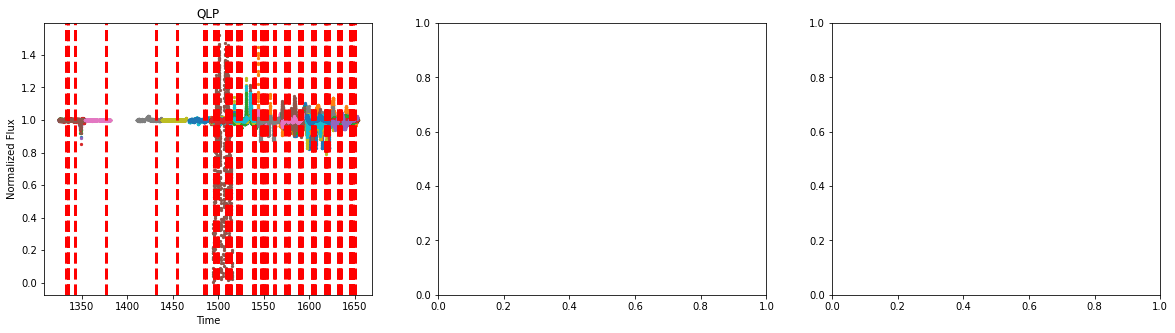

In [10]:
fig, ax = plt.subplots(1, 3, figsize=(20, 5))

for tic_id, current_sector in zip(tic_ids, sector):
    try:
        lightcurve = lightcurves_dict[tic_id]
        spoc_lc = lightcurves_spoc[tic_id]
        lc, info = import_lightcurve((data[(data.TIC_ID == tic_id) & (data.Sector == sector)].abs_path.values[0]))

        ax[0].scatter(lightcurve.time.value, lightcurve.flux.data / np.median(lightcurve.sap_flux.data), s=5)
        ax[0].set_xlabel('Time')
        ax[0].set_ylabel('Normalized Flux')
        ax[0].set_title('QLP')
        ax[0].axvline(data[data.TIC_ID == tic_id].time.values[0], linewidth=3, color='red', linestyle='--')

        ax[1].scatter(spoc_lc['TIME'], spoc_lc['PDCSAP_FLUX'] / np.median(spoc_lc['PCA_FLUX']), s=5)
        ax[1].set_xlabel('Time')
        ax[1].set_title('TESS-SPOC')
        ax[1].axvline(data[data.TIC_ID == tic_id].time.values[0], linewidth=3, color='red', linestyle='--')

        ax[2].scatter(lc['TIME'], lc['PCA_FLUX'] / np.median(lc['PCA_FLUX']), s=5)
        ax[2].set_xlabel('Time')
        ax[2].set_title('eleanor-lite')
        ax[2].axvline(data[data.TIC_ID == tic_id].time.values[0], linewidth=3, color='red', linestyle='--')

        for axis in ax:
            axis.set_ylim(0.99, 1.01)

        fig.suptitle(f"TIC {tic_id}")
        plt.show()

        _, _ = processing(lc, lc_info=info, method='median', make_plots=True)
    except Exception as e:
        print(f"Error processing TIC {tic_id}: {e}")


In [27]:
data[data.TIC_ID == 406277263].abs_path.values[0]

'/storage/astro2/phrdhx/eleanor-lite-project-v2/s0001/hlsp_gsfc-eleanor-lite_tess_ffi_s0001-0000000406277263_tess_v1.0_lc.fits'